In [14]:
from PIL import Image, ImageOps
import pandas as pd
import numpy as np
import os

In [15]:
data = pd.read_csv("../../data/raw/data.csv")

In [16]:
def concat_images(image_paths, size, shape=None):
    # Open images and resize them
    width, height = size
    images = map(Image.open, image_paths)
    images = [ImageOps.fit(image, size, Image.ANTIALIAS)
              for image in images]

    shape = shape if shape else (1, len(images))
    image_size = (width * shape[1], height * shape[0])
    image = Image.new('RGB', image_size)

    # Paste images into final image
    for row in range(shape[0]):
        for col in range(shape[1]):
            offset = width * col, height * row
            idx = row * shape[1] + col
            image.paste(images[idx], offset)

    return image

### 0 degree image from random location

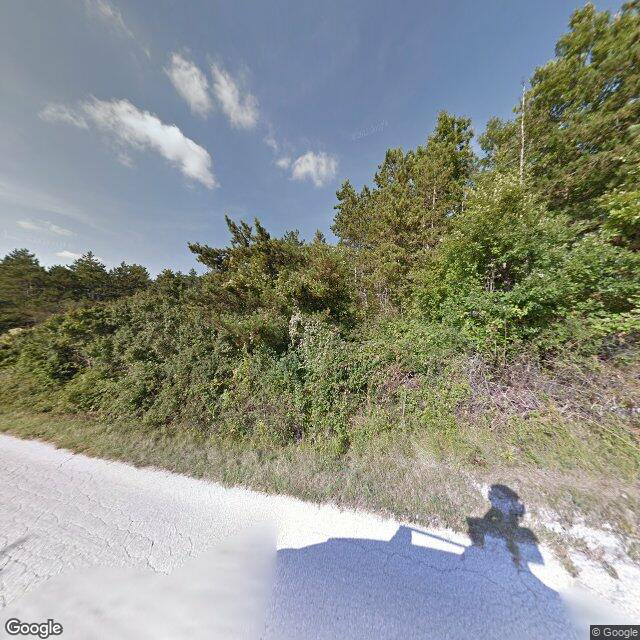

In [145]:
index = np.random.randint(len(data))
folder_name = data.iloc[index]["uuid"]
image_path = "../../data/raw/data/" + folder_name + "/0.jpg"
image = Image.open(image_path)
image

### All 4 images from random location

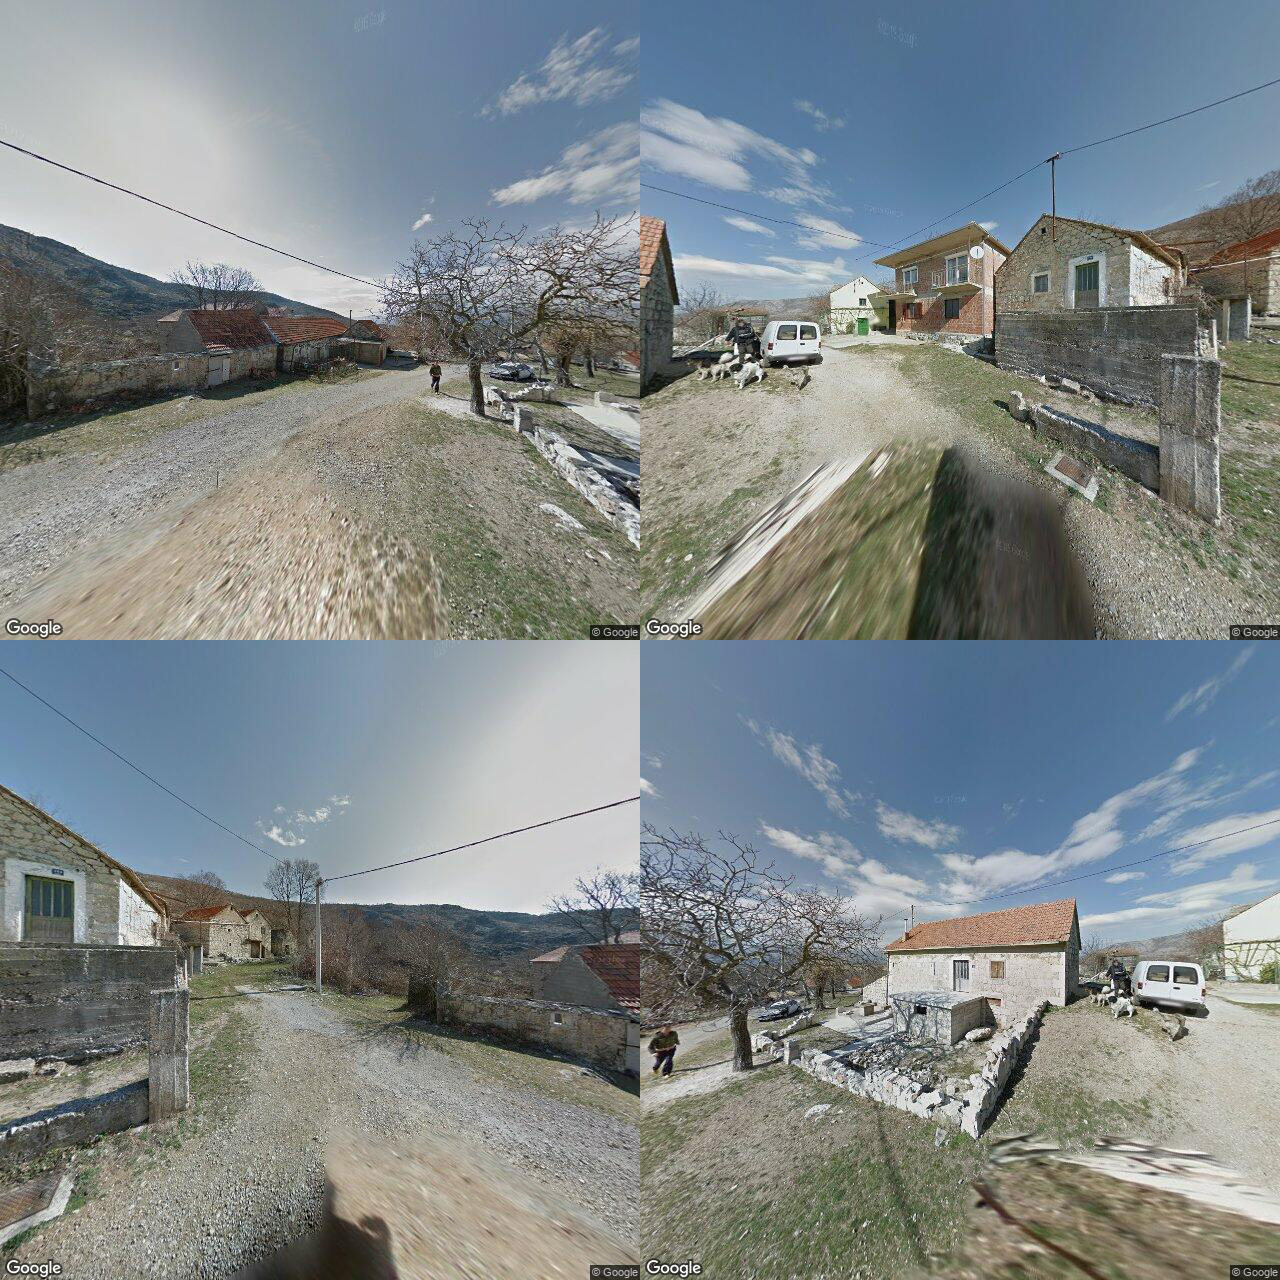

In [53]:
index = np.random.randint(len(data))
folder_name = data.iloc[index]["uuid"]
images_path = "../../data/raw/data/" + folder_name
image_paths = []
for path in os.listdir(images_path):
    image_paths.append(os.path.join(images_path, path))
grid = concat_images(image_paths, size=(640,640), shape=(2,2))
grid